# Museums
A new world organization has just been created. It includes all the museum management committees that have more than 2,000,000 visitors annually (in 2017). This list is available via Wikipedia: 
https://en.wikipedia.org/wiki/List_of_most_visited_museums

This new organization wishes to correlate the tourist attendance at their museums with the population of the respective cities. To achieve this, a small, common and harmonized database must be built to be able to extract features. This DB must include the characteristics of museums as well as the population of the cities in which they are located. You have been chosen to build this database. In addition, you are asked to create a small linear regression ML algorithm to correlate the city population and the influx of visitors.  You must use the Wikipedia APIs to retrieve this list of museums and their characteristics. You are free to choose the source of your choice for the population of the cities concerned.

It is required that your code is in Python and you have done some R&D work in a Jupyter notebook in python (which can be executed locally or via a web-hosted platform such as Colab: https://colab.research.google.com/notebooks/welcome.ipynb) using some visualization.

It is also required that your code can be executed in a Docker container (use Docker Compose if you require additional infrastructure).

You will be evaluated not only on how your code works but also on the rationale for the choices you make.

## About
This jupyter notebook is a proof of concept to correlate museum attendence and the population of the city it is located in.

## Imports

In [20]:
import pandas as pd
import wikipedia
import googlemaps as gm
import numpy as np
import wikipediaapi
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Pandas museums
Creates a dataframe containing the list of the most visited museums in the world that have greater than 2000000 visitors per year.

In [21]:
museumsdf = pd.read_html('https://en.wikipedia.org/wiki/List_of_most-visited_museums')
museums_gt_2m = museumsdf[0][museumsdf[0]['Visitors per year'] > 2000000]
museums_gt_2m

,Name,"Country flag, city",Visitors per year,Year reported[b]
0,Louvre,Paris,9600000,2019[12]
1,National Museum of China,Beijing,7390000,2019[12]
2,Vatican Museums,Vatican City,6882931,2019[12]
3,Metropolitan Museum of Art[c],New York City,6479548,2019[12]
4,British Museum,London,6239983,2019[12]
...,...,...,...,...
63,National Museum of Scotland,Edinburgh,2210024,2019[15]
64,California Science Center,Los Angeles,2200000,2019[13]
65,Van Gogh Museum,Amsterdam,2100000,2019[15]
66,Shanghai Museum,Shanghai,2070270,2019[15]


## Pandas largest cities
Creates a dataframe containing the list of the most populous cities in the world.

In [22]:
populationdf = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_cities')
city_and_pop = populationdf[1]['City[a]'].join(populationdf[1]['City proper[c]'])
city_and_pop

,City[a],Definition,Population,Area(km2)
0,Tokyo,Metropolis prefecture,"13,515,271[14]","2,191[14]"
1,Delhi,National capital territory,"16,753,235[16]",1484
2,Shanghai,Municipality,"24,183,000[18]",6341
3,São Paulo,Municipality,"12,252,023[19]",1521
4,Mexico City,City-state,"8,918,653[21]",1485
...,...,...,...,...
76,"Washington, D.C.",Federal district,"702,455[30]",177
77,Yangon,City,NaN,NaN
78,Alexandria,Urban governorate,NaN,NaN
79,Jinan,City (sub-provincial),8700000,10244


## Join the Pandas
Join the previous 2 pandas to associate the museums stats and the city population stats.

In [25]:
museums_and_pop = museums_gt_2m.merge(city_and_pop, right_on='City[a]', left_on='Country flag, city', how='left').fillna('n/a')
museums_and_pop

,Name,"Country flag, city",Visitors per year,Year reported[b],City[a],Definition,Population,Area(km2)
0,Louvre,Paris,9600000,2019[12],Paris,Commune,"2,148,271[51]",105
1,National Museum of China,Beijing,7390000,2019[12],Beijing,Municipality,"21,707,000[18]",16411
2,Vatican Museums,Vatican City,6882931,2019[12],n/a,n/a,n/a,n/a
3,Metropolitan Museum of Art[c],New York City,6479548,2019[12],New York City,City,"8,398,748[30]",786
4,British Museum,London,6239983,2019[12],London,Capital city,"8,825,001[68]",1572
...,...,...,...,...,...,...,...,...
63,National Museum of Scotland,Edinburgh,2210024,2019[15],n/a,n/a,n/a,n/a
64,California Science Center,Los Angeles,2200000,2019[13],Los Angeles,City,"3,990,456[30]",1214
65,Van Gogh Museum,Amsterdam,2100000,2019[15],n/a,n/a,n/a,n/a
66,Shanghai Museum,Shanghai,2070270,2019[15],Shanghai,Municipality,"24,183,000[18]",6341


In [26]:
custom_museums_and_pop = museums_and_pop[['Name', 'Country flag, city', 'Visitors per year', 'Population']]
custom_museums_and_pop

,Name,"Country flag, city",Visitors per year,Population
0,Louvre,Paris,9600000,"2,148,271[51]"
1,National Museum of China,Beijing,7390000,"21,707,000[18]"
2,Vatican Museums,Vatican City,6882931,n/a
3,Metropolitan Museum of Art[c],New York City,6479548,"8,398,748[30]"
4,British Museum,London,6239983,"8,825,001[68]"
...,...,...,...,...
63,National Museum of Scotland,Edinburgh,2210024,n/a
64,California Science Center,Los Angeles,2200000,"3,990,456[30]"
65,Van Gogh Museum,Amsterdam,2100000,n/a
66,Shanghai Museum,Shanghai,2070270,"24,183,000[18]"


## Cleanup and add missing data

### Check which cities are missing Population

In [27]:
custom_museums_and_pop[custom_museums_and_pop['Population'] == 'n/a']

,Name,"Country flag, city",Visitors per year,Population
2,Vatican Museums,Vatican City,6882931,n/a
9,State Hermitage Museum,Saint Petersburg,4956529,n/a
20,National Palace Museum[d],Taipei,3832373,n/a
24,Mevlana Museum,Konya,3464155,n/a
31,Hunan Museum,Changsha,3140000,n/a
34,National Taiwan Science Education Center,Taipei,3000000,n/a
42,Rijksmuseum,Amsterdam,2700000,n/a
44,National Museum of Natural Science,Taichung,2650000,n/a
50,NGV International,Melbourne,2432883,n/a
52,Russian Museum,Saint Petersburg,2394400,n/a


### Manually complete the missing data
Since this is a proof of concept and that there are only 13 missing cities, the data can be filled manually. In production, I would pick either a wikipedia summary parser or additional datasets to fill the missing data. The source for this data is: https://www.macrotrends.net/cities or wikipedia.

In [40]:
population_cleaned_column = custom_museums_and_pop['Population'].str.replace(',', '').replace([r'\[\d\d\]'], '', regex=True)
pop_cleaned = population_cleaned_column.to_frame('Population Cleaned')

def update_population(df):
    df_copy = df.copy()
    for index, row in df.iterrows():
        if row['Country flag, city'] == 'Vatican City':
            # We use Rome as the population in this case as Vatican City is very small and within Rome
            df_copy.at[index, 'Population Cleaned'] = 4257000
        elif row['Country flag, city'] == 'Saint Petersburg':
            df_copy.at[index, 'Population Cleaned'] = 5468000
        elif row['Country flag, city'] == 'Taipei':
            df_copy.at[index, 'Population Cleaned'] = 2646204
        elif row['Country flag, city'] == 'Konya':
            df_copy.at[index, 'Population Cleaned'] = 1328000
        elif row['Country flag, city'] == 'Changsha':
            df_copy.at[index, 'Population Cleaned'] = 4578000
        elif row['Country flag, city'] == 'Amsterdam':
            df_copy.at[index, 'Population Cleaned'] = 1149000
        elif row['Country flag, city'] == 'Taichung':
            df_copy.at[index, 'Population Cleaned'] = 2767200
        elif row['Country flag, city'] == 'Melbourne':
            df_copy.at[index, 'Population Cleaned'] = 4968000
        elif row['Country flag, city'] == 'Florence':
            df_copy.at[index, 'Population Cleaned'] = 708000
        elif row['Country flag, city'] == 'Hohhot':
            df_copy.at[index, 'Population Cleaned'] = 2009000
        elif row['Country flag, city'] == 'Oświęcim':
            df_copy.at[index, 'Population Cleaned'] = 39057
        elif row['Country flag, city'] == 'Wenzhou':
            df_copy.at[index, 'Population Cleaned'] = 3624000
        elif row['Country flag, city'] == 'Edinburgh':
            df_copy.at[index, 'Population Cleaned'] = 537000
    return df_copy


df = custom_museums_and_pop.join(pd.to_numeric(update_population(new_df)['Population Cleaned']))
df

,Name,"Country flag, city",Visitors per year,Population,Population Cleaned
0,Louvre,Paris,9600000,"2,148,271[51]",2148271
1,National Museum of China,Beijing,7390000,"21,707,000[18]",21707000
2,Vatican Museums,Vatican City,6882931,n/a,4257000
3,Metropolitan Museum of Art[c],New York City,6479548,"8,398,748[30]",8398748
4,British Museum,London,6239983,"8,825,001[68]",8825001
...,...,...,...,...,...
63,National Museum of Scotland,Edinburgh,2210024,n/a,537000
64,California Science Center,Los Angeles,2200000,"3,990,456[30]",3990456
65,Van Gogh Museum,Amsterdam,2100000,n/a,1149000
66,Shanghai Museum,Shanghai,2070270,"24,183,000[18]",24183000


## Verify that the data was correctly completed

In [29]:
df[df['Population'] == 'n/a']

,Name,"Country flag, city",Visitors per year,Population,Population Cleaned
2,Vatican Museums,Vatican City,6882931,n/a,4257000
9,State Hermitage Museum,Saint Petersburg,4956529,n/a,5468000
20,National Palace Museum[d],Taipei,3832373,n/a,2646204
24,Mevlana Museum,Konya,3464155,n/a,1328000
31,Hunan Museum,Changsha,3140000,n/a,4578000
34,National Taiwan Science Education Center,Taipei,3000000,n/a,2646204
42,Rijksmuseum,Amsterdam,2700000,n/a,1149000
44,National Museum of Natural Science,Taichung,2650000,n/a,2767200
50,NGV International,Melbourne,2432883,n/a,4968000
52,Russian Museum,Saint Petersburg,2394400,n/a,5468000


## Perform linear regression
Perform a linear regression and display results with matplotlib.

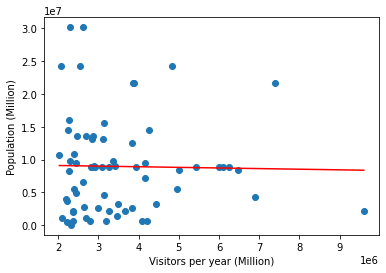

In [142]:
# Attendence of the museum
X = df.iloc[:, 2].values.reshape(-1, 1)
# Population of the city
Y = df.iloc[:, 4].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Visitors per year (Million)')
plt.ylabel('Population (Million)')
plt.show()

# Interpretation of the results #1
I am not sure how to explain the results, one would expect visits of a museum to be correlated with the population of a given city, but it seem it doesn't.

A few things could explain this:
1. My method for fetching data was very crude
2. I have made a mistake somewhere
3. Museums visits may be correlated with another factor, such as tourism, square feet of the museum or number of pieces.

# Try linear regression with international visitors instead of population
Instead of trying to link population with museums visitors per year, let's try with number of tourists (arrivals).

## Add the arrivals to the previous DataFrame

In [128]:
# https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors
def cleanup_international_visitors(df):
    # Some data doesn't match the museums dataframe's cities, make them match
    df_copy = df.copy()
    for index, row in df.iterrows():
        if row['City'] == 'Washington D.C.':
            df_copy.at[index, 'City'] = 'Washington, D.C.'
    return df_copy

cities_arrivals_2016 = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors')
# cities_arrivals_2016[0]

df_with_arrivals = df.merge(cleanup_international_visitors(cities_arrivals_2016[0]), right_on='City', left_on='Country flag, city', how='left')[['Name', 'Country flag, city', 'Visitors per year', 'Population Cleaned', 'Arrivals 2018(Euromonitor)', 'Arrivals 2016(Mastercard)']].fillna(0)
df_with_arrivals

,Name,"Country flag, city",Visitors per year,Population Cleaned,Arrivals 2018(Euromonitor),Arrivals 2016(Mastercard)
0,Louvre,Paris,9600000,2148271,17560200.0,18030000.0
1,National Museum of China,Beijing,7390000,21707000,4002400.0,4050000.0
2,Vatican Museums,Vatican City,6882931,4257000,0.0,0.0
3,Metropolitan Museum of Art[c],New York City,6479548,8398748,13600000.0,12750000.0
4,British Museum,London,6239983,8825001,19233000.0,19880000.0
...,...,...,...,...,...,...
63,National Museum of Scotland,Edinburgh,2210024,537000,0.0,1660000.0
64,California Science Center,Los Angeles,2200000,3990456,6591300.0,5600000.0
65,Van Gogh Museum,Amsterdam,2100000,1149000,8354200.0,8000000.0
66,Shanghai Museum,Shanghai,2070270,24183000,7483500.0,6120000.0


## Merge columns Rank(Euromonitor)	and Rank(Mastercard)

In [129]:
merged_arrivals = pd.DataFrame(np.where(df_with_arrivals['Arrivals 2018(Euromonitor)'] >= df_with_arrivals['Arrivals 2016(Mastercard)'], df_with_arrivals['Arrivals 2018(Euromonitor)'], df_with_arrivals['Arrivals 2016(Mastercard)']), columns=['Arrivals Merged'])
df_with_merged_arrivals = df_with_arrivals.join(merged_arrivals)
df_with_merged_arrivals

,Name,"Country flag, city",Visitors per year,Population Cleaned,Arrivals 2018(Euromonitor),Arrivals 2016(Mastercard),Arrivals Merged
0,Louvre,Paris,9600000,2148271,17560200.0,18030000.0,18030000.0
1,National Museum of China,Beijing,7390000,21707000,4002400.0,4050000.0,4050000.0
2,Vatican Museums,Vatican City,6882931,4257000,0.0,0.0,0.0
3,Metropolitan Museum of Art[c],New York City,6479548,8398748,13600000.0,12750000.0,13600000.0
4,British Museum,London,6239983,8825001,19233000.0,19880000.0,19880000.0
...,...,...,...,...,...,...,...
63,National Museum of Scotland,Edinburgh,2210024,537000,0.0,1660000.0,1660000.0
64,California Science Center,Los Angeles,2200000,3990456,6591300.0,5600000.0,6591300.0
65,Van Gogh Museum,Amsterdam,2100000,1149000,8354200.0,8000000.0,8354200.0
66,Shanghai Museum,Shanghai,2070270,24183000,7483500.0,6120000.0,7483500.0


## Display missing cities arrivals

In [132]:
#df_with_merged_arrivals[(df_with_merged_arrivals['Rank(Euromonitor)'] == 0) & (df_with_merged_arrivals['Rank(Mastercard)'] == 0)]
df_with_merged_arrivals[(df_with_merged_arrivals['Arrivals 2018(Euromonitor)'] == 0) & (df_with_merged_arrivals['Arrivals 2016(Mastercard)'] == 0)]['Country flag, city'].unique()

#df_with_merged_arrivals[df_with_merged_arrivals[] == 'London']

array(['Vatican City', 'Nanjing', 'Konya', 'Changsha', 'Taichung',
       'Chongqing', 'Wuhan', 'Hohhot', 'Oświęcim', 'Shenyang', 'Wenzhou',
       'Suzhou'], dtype=object)

## Fill missing arrivals

In [145]:
def update_arrivals(df):
    df_copy = df.copy()
    for index, row in df.iterrows():
        if row['Country flag, city'] == 'Vatican City':
            # We use Rome as the arrivals in this case as Vatican City is very small and within Rome
            df_copy.at[index, 'Arrivals Merged'] = 10065400
        elif row['Country flag, city'] == 'Nanjing':
            # https://apps.fas.usda.gov/newgainapi/api/report/downloadreportbyfilename?filename=Emerging%20City%20Market%20Report%20-%20Nanjing_Shanghai%20ATO_China%20-%20Peoples%20Republic%20of_3-1-2018.pdf
            df_copy.at[index, 'Arrivals Merged'] = 0.588000
        elif row['Country flag, city'] == 'Konya':
            # There is only 1 museum listed in Turkey for the wikipedia list, 51M is the nb. of tourists in Turkey
            df_copy.at[index, 'Arrivals Merged'] = 51000000
        elif row['Country flag, city'] == 'Changsha':
            # http://en.people.cn/n3/2019/0214/c313938-9546263.html
            df_copy.at[index, 'Arrivals Merged'] = 4089200
        elif row['Country flag, city'] == 'Taichung':
            df_copy.at[index, 'Arrivals Merged'] = 7500000
        elif row['Country flag, city'] == 'Chongqing':
            df_copy.at[index, 'Arrivals Merged'] = 1900000
        elif row['Country flag, city'] == 'Wuhan':
            # Could not find data for Wuhan, will take # of arrivals in China and divide it by the number of museums
            df_copy.at[index, 'Arrivals Merged'] = 7900000
        elif row['Country flag, city'] == 'Hohhot':
            df_copy.at[index, 'Arrivals Merged'] = 16980000
        elif row['Country flag, city'] == 'Oświęcim':
            df_copy.at[index, 'Arrivals Merged'] = 2150000
        elif row['Country flag, city'] == 'Shenyang':
            # Could not find data for Wenzhou, will take # of arrivals in China and divide it by the number of museums
            df_copy.at[index, 'Arrivals Merged'] = 7900000
        elif row['Country flag, city'] == 'Wenzhou':
            # Could not find data for Suzhou, will take # of arrivals in China and divide it by the number of museums
            df_copy.at[index, 'Arrivals Merged'] = 7900000
        elif row['Country flag, city'] == 'Suzhou':
            # https://www.ceicdata.com/en/china/visitor-arrival-prefecture-level-city/cn-visitor-arrival-jiangsu-suzhou
            df_copy.at[index, 'Arrivals Merged'] = 7900000
    return df_copy

arrivals_df = update_arrivals(df_with_merged_arrivals)
arrivals_df

,Name,"Country flag, city",Visitors per year,Population Cleaned,Arrivals 2018(Euromonitor),Arrivals 2016(Mastercard),Arrivals Merged
0,Louvre,Paris,9600000,2148271,17560200.0,18030000.0,18030000.0
1,National Museum of China,Beijing,7390000,21707000,4002400.0,4050000.0,4050000.0
2,Vatican Museums,Vatican City,6882931,4257000,0.0,0.0,10065400.0
3,Metropolitan Museum of Art[c],New York City,6479548,8398748,13600000.0,12750000.0,13600000.0
4,British Museum,London,6239983,8825001,19233000.0,19880000.0,19880000.0
...,...,...,...,...,...,...,...
63,National Museum of Scotland,Edinburgh,2210024,537000,0.0,1660000.0,1660000.0
64,California Science Center,Los Angeles,2200000,3990456,6591300.0,5600000.0,6591300.0
65,Van Gogh Museum,Amsterdam,2100000,1149000,8354200.0,8000000.0,8354200.0
66,Shanghai Museum,Shanghai,2070270,24183000,7483500.0,6120000.0,7483500.0


## Linear Regression with number of arrivals

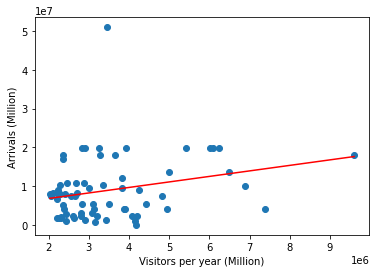

In [143]:
# Arrivals of the city
Y_2 = arrivals_df.iloc[:, 6].values.reshape(-1, 1)
# Attendence of the museum
X_2 = arrivals_df.iloc[:, 2].values.reshape(-1, 1)

linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_2, Y_2)
Y_pred_2 = linear_regressor_2.predict(X_2)

plt.scatter(X_2, Y_2)
plt.plot(X_2, Y_pred_2, color='red')
plt.ylabel('Arrivals (Million)')
plt.xlabel('Visitors per year (Million)')
plt.show()

## Interpretation of the results #2

We can see that the linear regression has identified a positive slope with the number of visitors and arrivals of tourists. However, by looking at the scattering of the points, we can see that the data is skewed towards the left, which may indicates that this is a problem better suited for multi-variable linear regression. By that, I mean that we didn't add the size of the museums and the number of pieces they contain, which could contribute to a better distribution of the points.

Also, one would assume that the slope would be closer to 1 to indicate a direct correlation with the number of visitors and the number of arrivals.

Again, since this is a proof of concept, the data was very crudely acquired.